
 An example of the minimzer usage in tensorflow
 the loss function is plotted and the result in terms of a line


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-04-11 16:44:42.299418: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 16:44:42.360104: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Define the training data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])


The input to the model is represented by the train_X 
Y_train represents the target or the truth values for the training data
The model will recieve train_X and make predictions on the weights
The difference between these predictions and the actual target values
train_Y will be used to update the weights and minimize the loss function.

In [3]:
# Define the model to a simple linear regression with only one dense layer and
# no activation function for the first layer all train_X points are input

# model = tf.keras.models.Sequential([
#  tf.keras.layers.Dense(1, input_shape=[1])
#])

In [4]:
# This model has 2 dense layers the first with relu activation
# and the 2nd layer has 1 output unit and uses the default
# linear activation function.

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(17, activation='relu',input_shape=[1]),
  tf.keras.layers.Dense(1)
])

2023-04-11 16:44:43.775141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# different optimizer methods can be enabled

model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')
#model.compile(optimizer=tf.keras.optimizers.SGD(0.01), loss='mean_squared_error')
#model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer=tf.keras.optimizers.Ftrl(learning_rate=0.015), loss='mean_squared_error')

In [6]:
# Train the model and access training parameters
history = model.fit(train_X, train_Y, epochs=60)
print(history.params)

Epoch 1/60
1/1 [==============================] - 0s 396ms/step - loss: 15.2606
Epoch 2/60
1/1 [==============================] - 0s 4ms/step - loss: 12.7440
Epoch 3/60
1/1 [==============================] - 0s 3ms/step - loss: 10.4745
Epoch 4/60
1/1 [==============================] - 0s 3ms/step - loss: 8.4519
Epoch 5/60
1/1 [==============================] - 0s 3ms/step - loss: 6.6738
Epoch 6/60
1/1 [==============================] - 0s 3ms/step - loss: 5.1356
Epoch 7/60
1/1 [==============================] - 0s 4ms/step - loss: 3.8306
Epoch 8/60
1/1 [==============================] - 0s 3ms/step - loss: 2.7499
Epoch 9/60
1/1 [==============================] - 0s 3ms/step - loss: 1.8823
Epoch 10/60
1/1 [==============================] - 0s 3ms/step - loss: 1.2142
Epoch 11/60
1/1 [==============================] - 0s 3ms/step - loss: 0.7292
Epoch 12/60
1/1 [==============================] - 0s 4ms/step - loss: 0.4087
Epoch 13/60
1/1 [==============================] - 0s 3ms/step - los

In [7]:
# Get the weights of the Dense layer
weights = model.layers[0].get_weights()
# Print the weight matrix and bias vector
print('Weight matrix shape:', weights[0].shape)
print('Bias vector shape:', weights[1].shape)
print (weights[0])

Weight matrix shape: (1, 17)
Bias vector shape: (17,)
[[-0.2720451   0.25746062  0.00145817 -0.14928943 -0.18011677 -0.38295865
  -0.10688066 -0.08276322 -0.06117761 -0.415354    0.21152566 -0.015845
  -0.22856292  0.25203183  0.29251993 -0.08234903  0.6508041 ]]


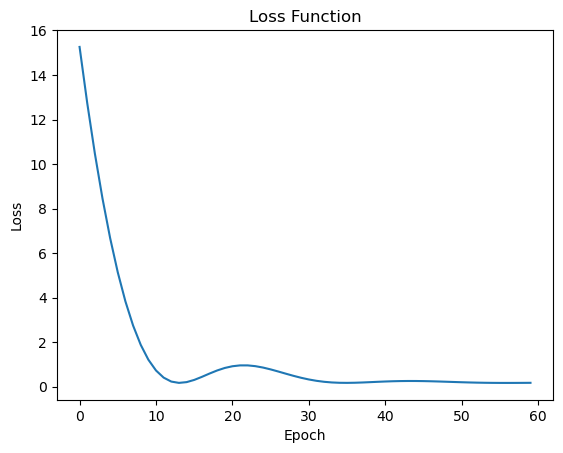

1/1 [==============================] - 0s 61ms/step


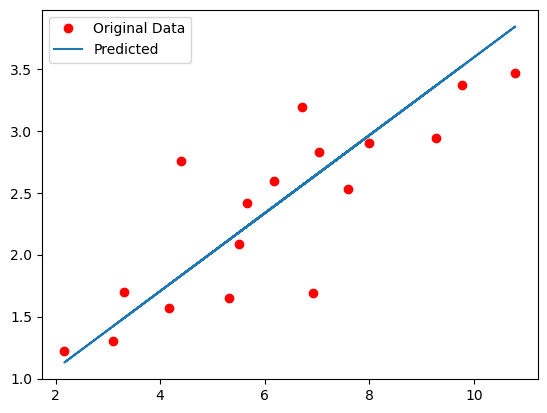

In [8]:
# Plot the loss function
plt.plot(history.history['loss'])
plt.title("Loss Function")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Plot the input data and the predicted values
plt.plot(train_X, train_Y, 'ro', label="Original Data")
plt.plot(train_X, model.predict(train_X), label="Predicted")
plt.legend()
plt.show()